In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv('dataset/customers.csv')
df_loans = pd.read_csv('dataset/loans.csv')
df_bureau = pd.read_csv('dataset/bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [5]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [7]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default'] = df['default'].map({True: 1, False: 0})
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [12]:
# df['default'] = df['default'].astype(int)
# df['default'].value_counts()

In [13]:
X = df.drop(['default'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [14]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode_residence = df_train['residence_type'].mode()[0]
df_train['residence_type'].fillna(mode_residence, inplace=True)

In [17]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [18]:
df_test.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [19]:
df_test['residence_type'].fillna(mode_residence, inplace=True)

In [20]:
df_train.duplicated().sum()

0

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 12746 to 37784
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37500 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [22]:
numerical_cols = df_train.select_dtypes(['int64', 'float64']).columns
categorical_cols = df_train.drop(['cust_id', 'loan_id'], axis=1).select_dtypes('object').columns 

In [23]:
numerical_cols

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [24]:
len(numerical_cols)

21

In [25]:
categorical_cols

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type', 'disbursal_date',
       'installment_start_dt'],
      dtype='object')

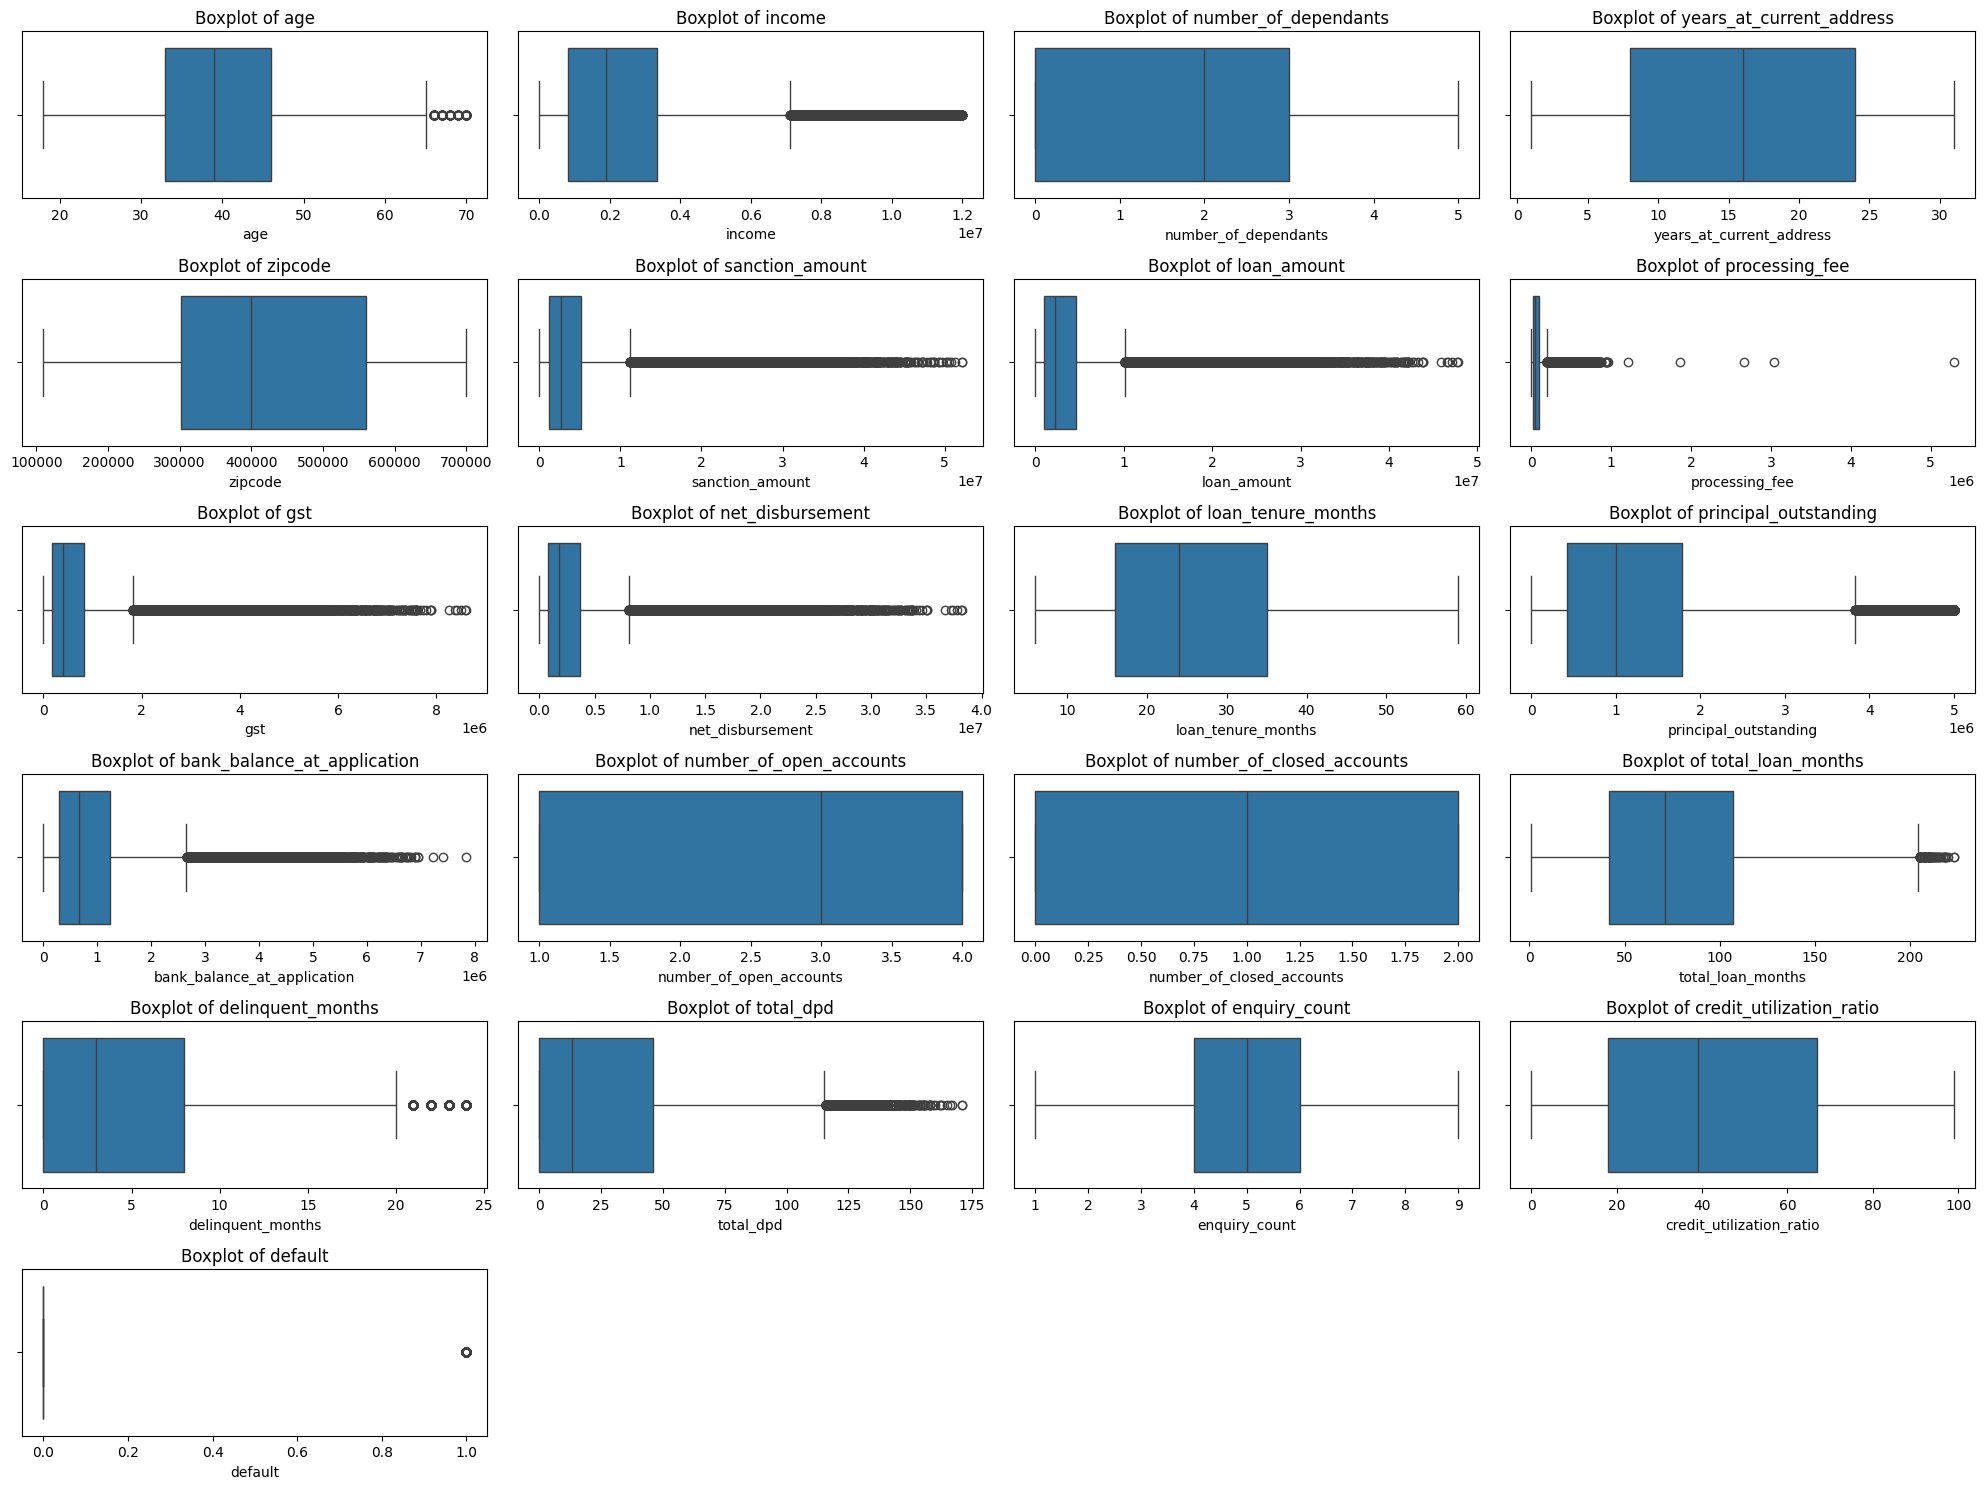

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.boxplot(df_train, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

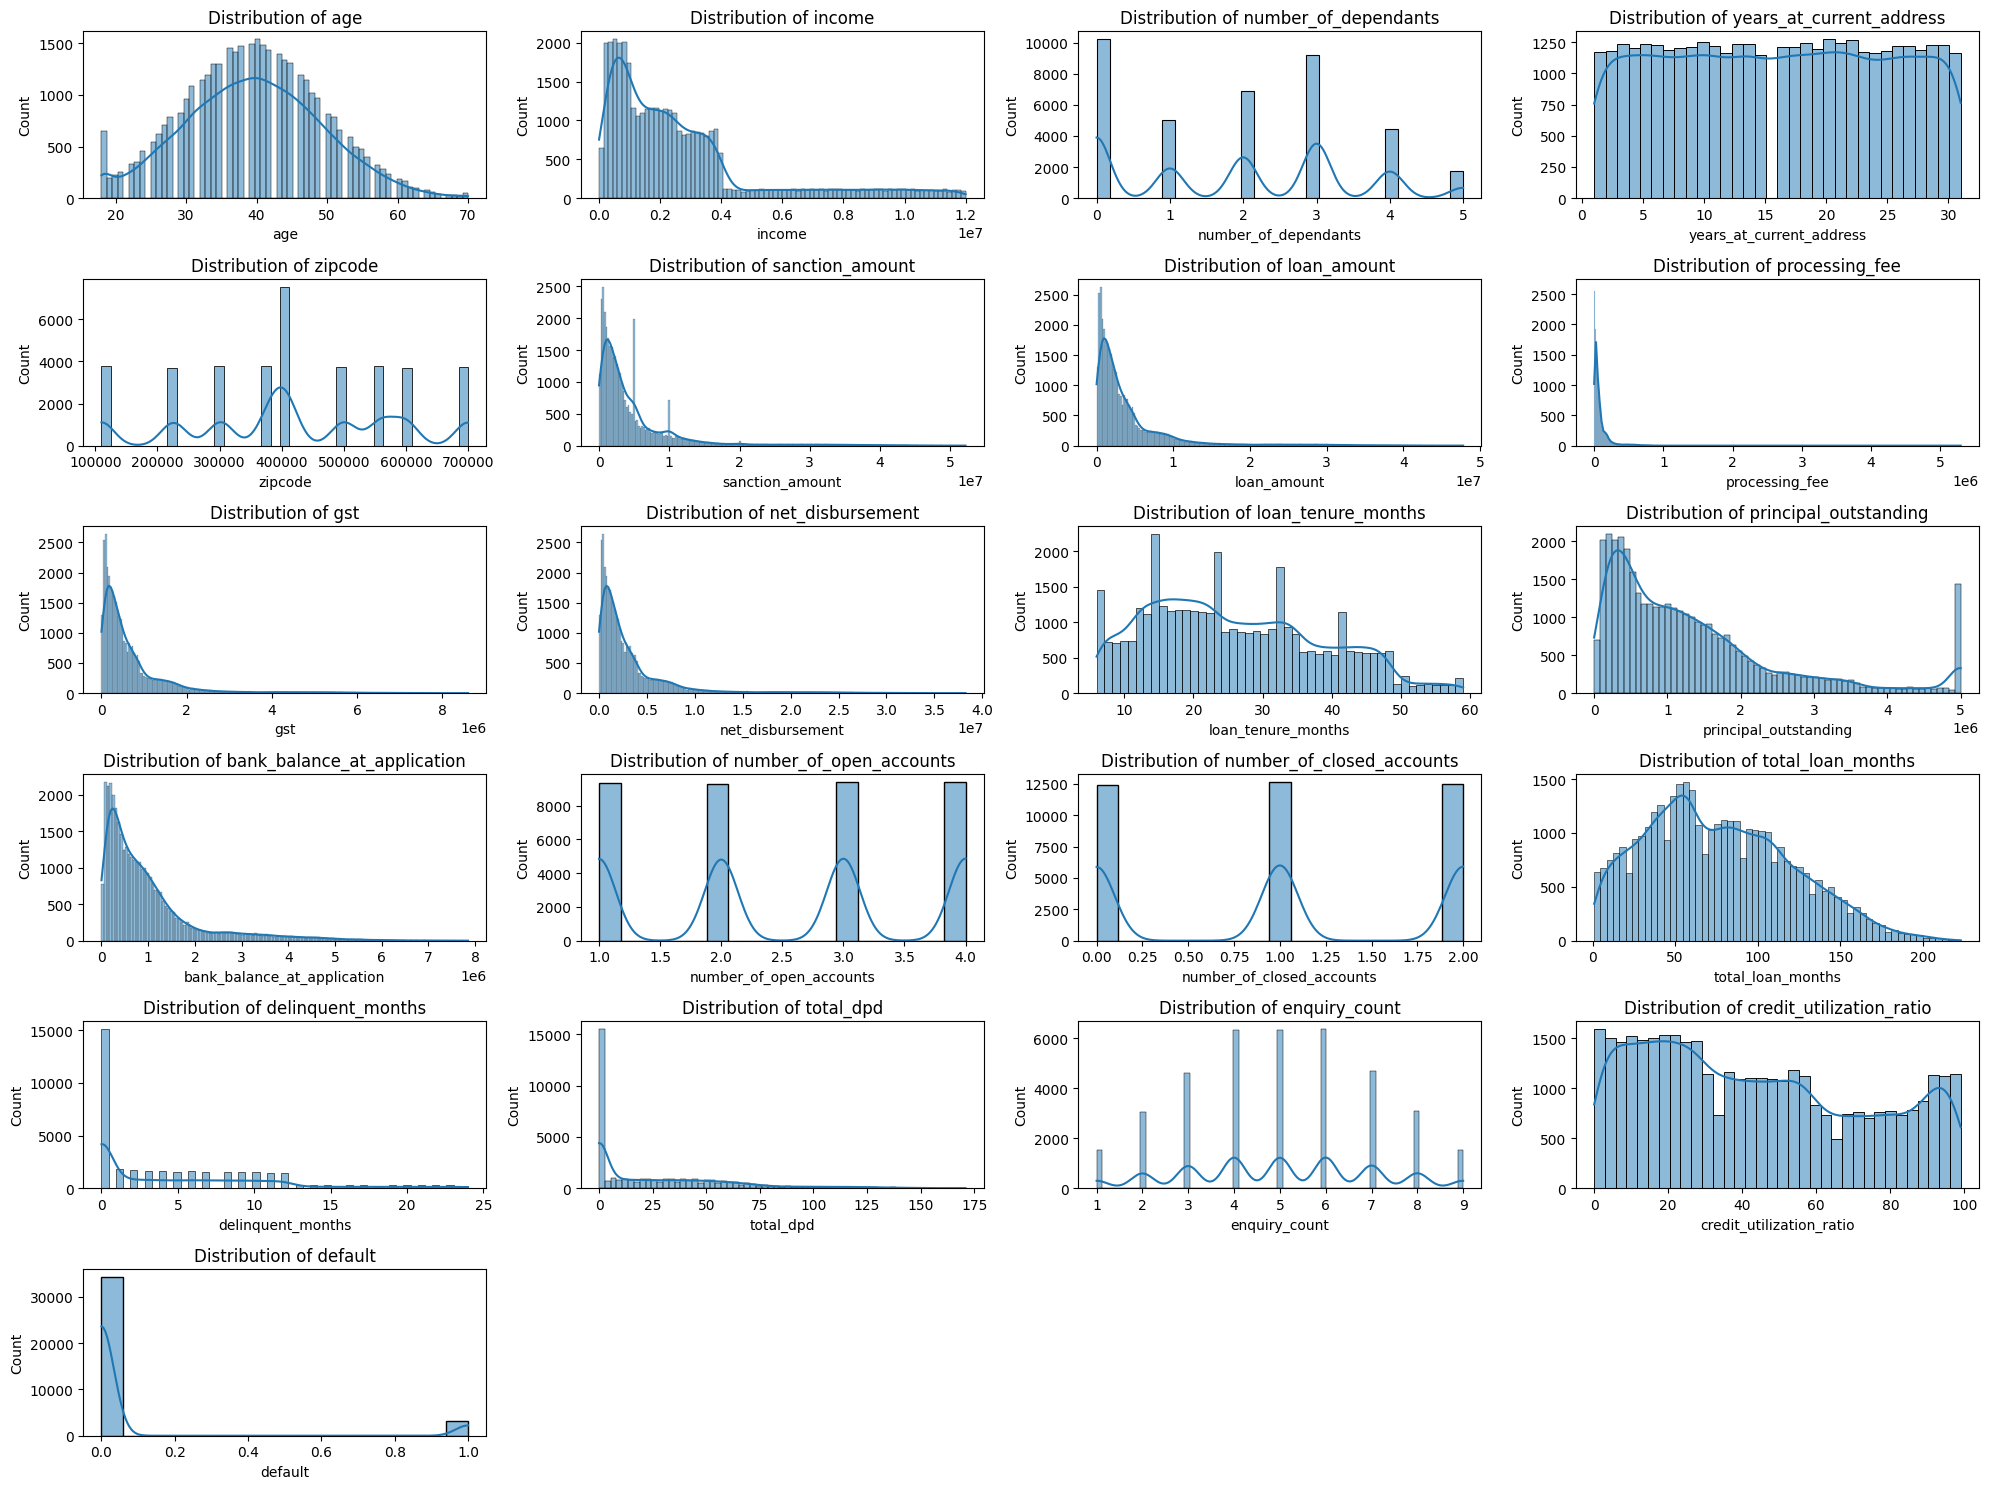

In [27]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.histplot(df_train, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [28]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [29]:
df_train[(df_train['processing_fee'] / df_train['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [30]:
df_train1 = df_train[(df_train['processing_fee'] / df_train['loan_amount']) < 0.03].copy()

In [31]:
df_train1[(df_train1['processing_fee'] / df_train1['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [32]:
df_test.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [33]:
df_test[(df_test['processing_fee'] / df_test['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
33705,3812000,5678020.86
12294,4639000,5698029.90


In [34]:
df_test1 = df_test[(df_test['processing_fee'] / df_test['loan_amount']) < 0.03].copy()

In [35]:
df_test1[(df_test1['processing_fee'] / df_test1['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [36]:
for col in categorical_cols:
    print(col, '--> ', df_train1[col].unique())

gender -->  ['M' 'F']
marital_status -->  ['Married' 'Single']
employment_status -->  ['Self-Employed' 'Salaried']
residence_type -->  ['Owned' 'Mortgage' 'Rented']
city -->  ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state -->  ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_purpose -->  ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type -->  ['Secured' 'Unsecured']
disbursal_date -->  ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt -->  ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


In [37]:
df_train1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
df_test1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

In [38]:
print('Train --> ', df_train1['loan_purpose'].unique())
print('Test --> ', df_test1['loan_purpose'].unique())


Train -->  ['Home' 'Education' 'Personal' 'Auto']
Test -->  ['Home' 'Education' 'Auto' 'Personal']


<h3 align='center' style='color:blue'>Exploratory Data Analysis</h3>

In [39]:
numerical_cols

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

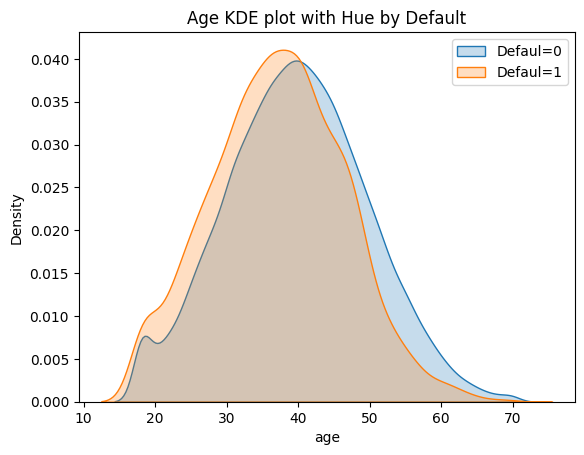

In [40]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['age'], fill=True, label='Defaul=0')
sns.kdeplot(df_train1[df_train1['default'] == 1]['age'], fill=True, label='Defaul=1')
plt.title(f'Age KDE plot with Hue by Default')
plt.legend()
plt.show()


Insight
1. Orange graph is little bit shited to the left of the blue graph which indicates that people with young age are more likely to default

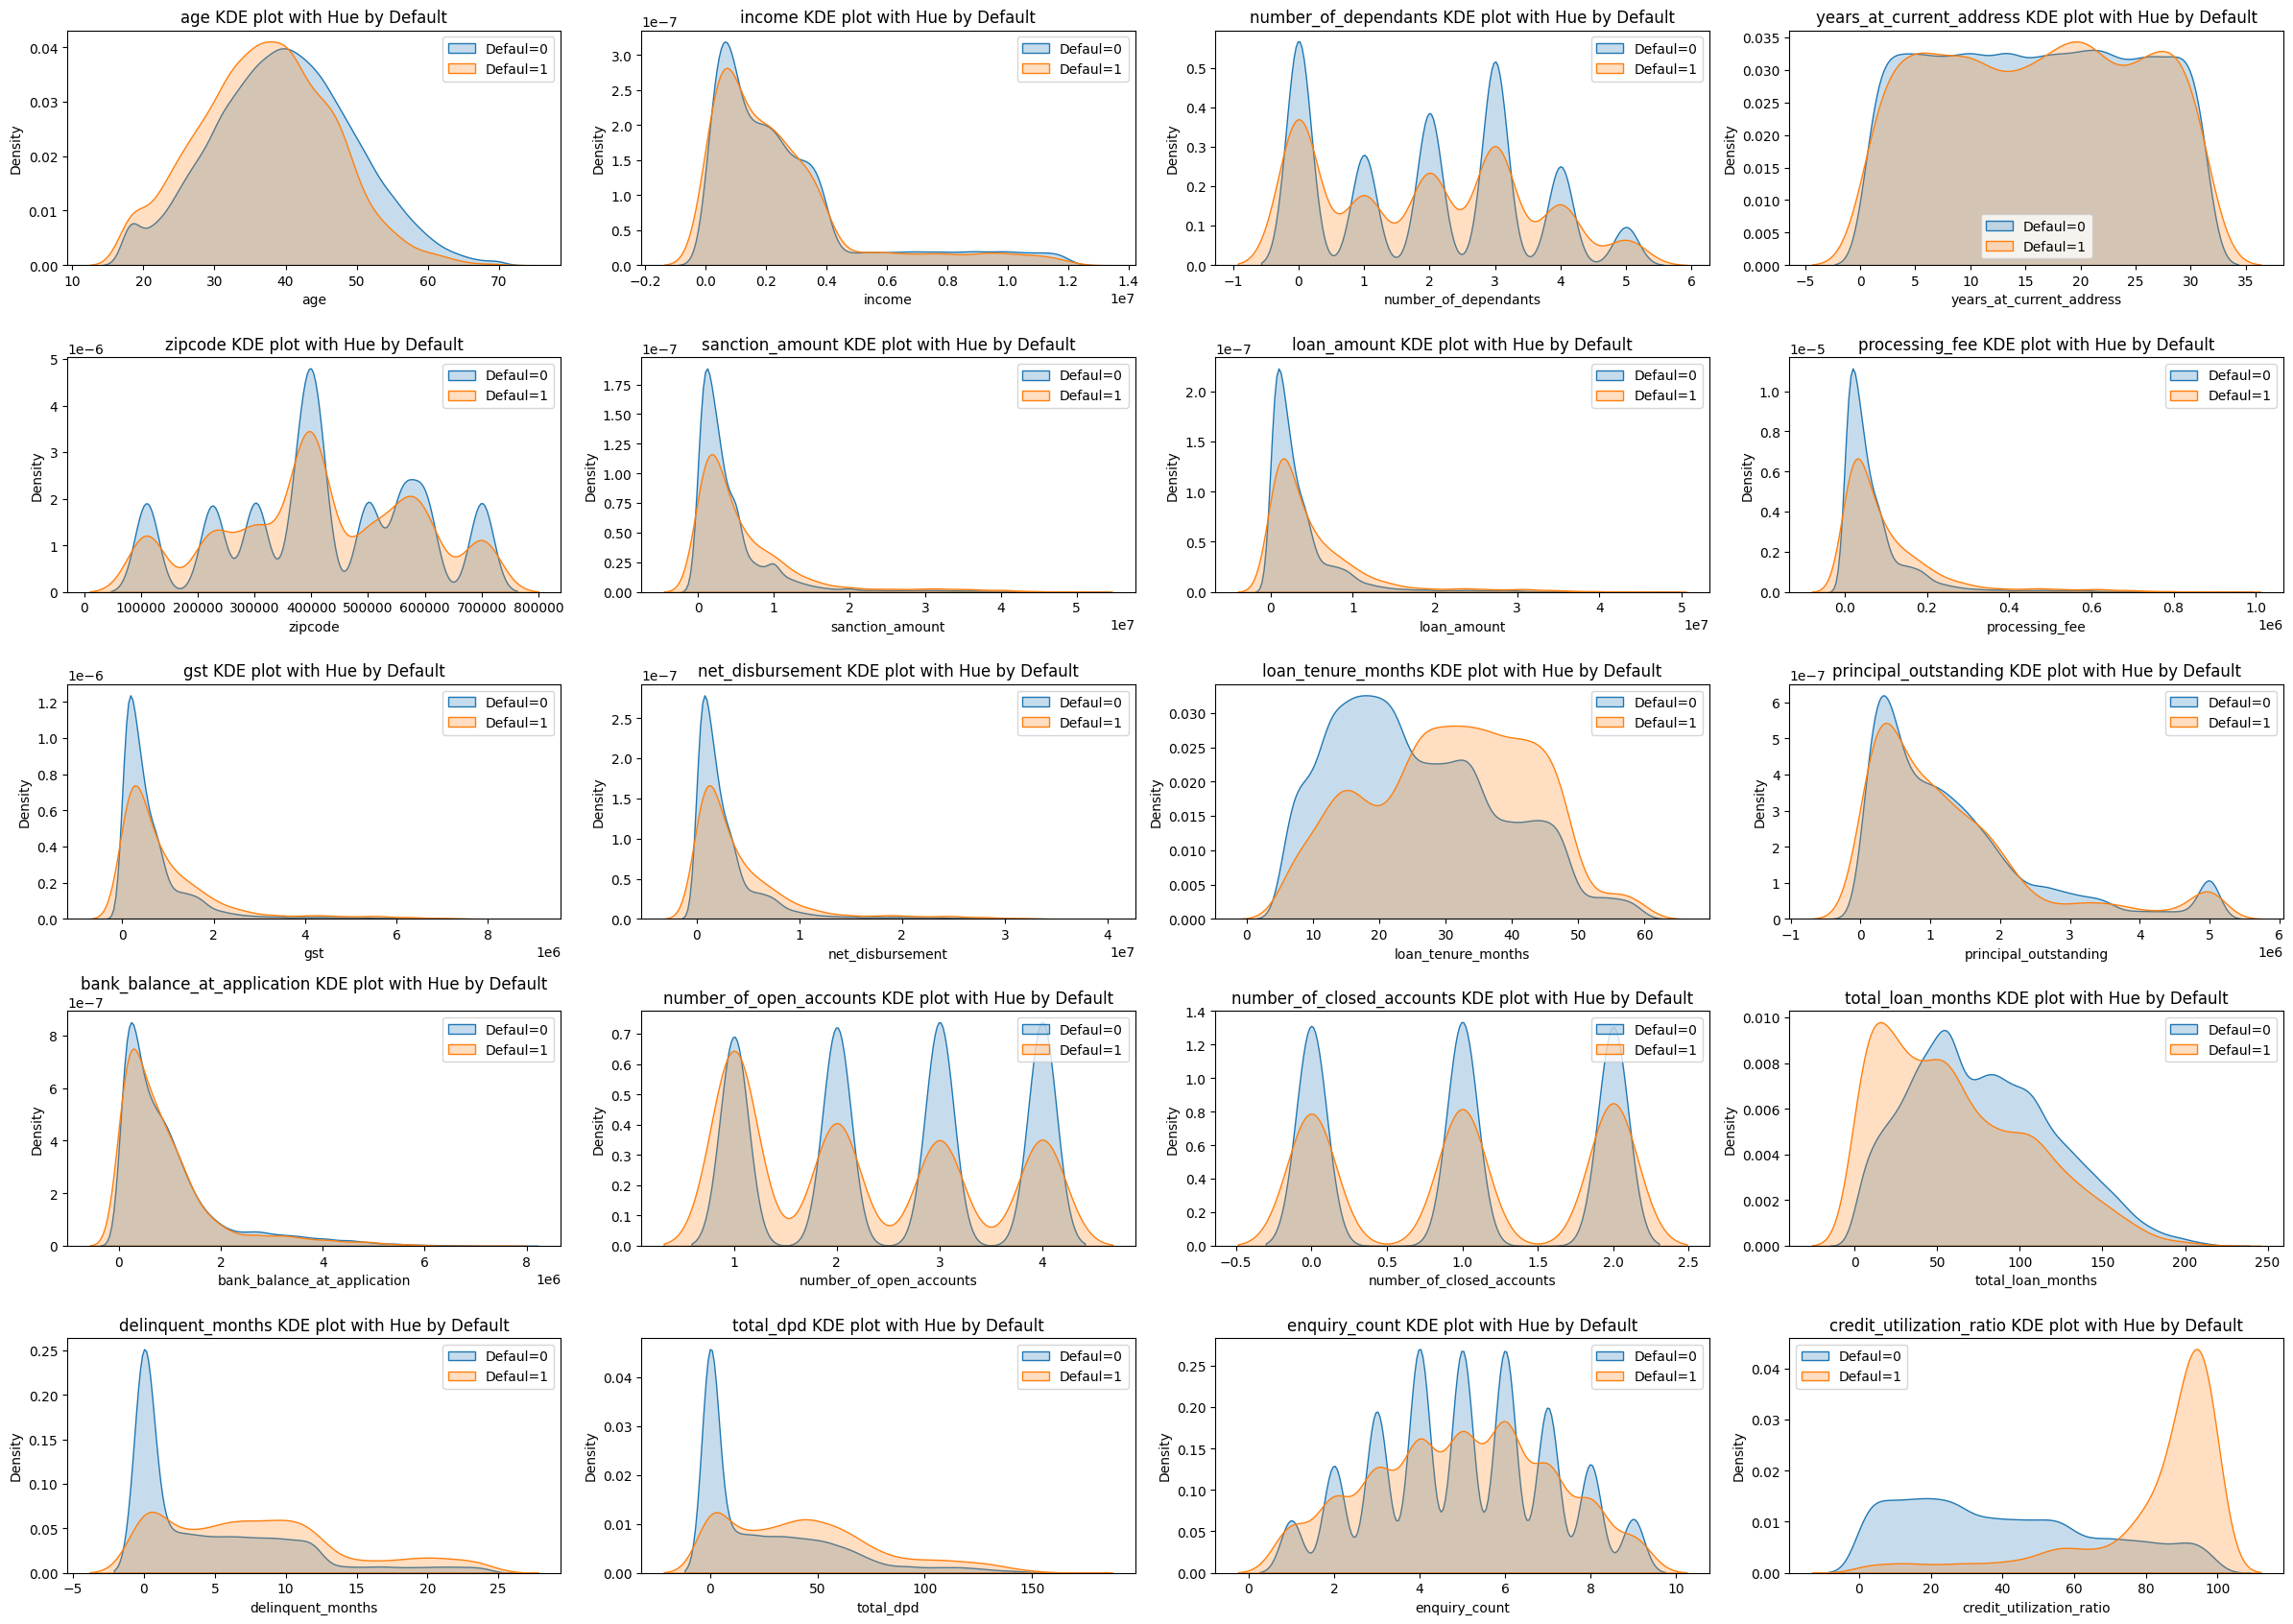

In [41]:
plt.figure(figsize=(24, 20))

for i, col in enumerate(numerical_cols[:20]):
    plt.subplot(6, 4, i + 1)
    sns.kdeplot(df_train1[df_train1['default'] == 0][col], fill=True, label='Defaul=0')
    sns.kdeplot(df_train1[df_train1['default'] == 1][col], fill=True, label='Defaul=1')
    plt.title(f'{col} KDE plot with Hue by Default')
    plt.legend()

plt.tight_layout()
plt.show()


Insights
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelihood of becoming a default. Hence these 4 looks like strong predictors.
2. In the remaining columns the distributions do not give any obvious insights
3. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 align='center' style='color:blue'>Feature Engineering</h3>

In [42]:
df_train1['loan_to_income_ratio'] = round(df_train1['loan_amount']/df_train1['income'], 2)
df_train1['loan_to_income_ratio'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income_ratio, dtype: float64

In [43]:
df_test1['loan_to_income_ratio'] = round(df_test1['loan_amount']/df_test1['income'], 2)
df_test1['loan_to_income_ratio'].describe()

count   12497.00
mean        1.55
std         0.97
min         0.30
25%         0.78
50%         1.16
75%         2.43
max         4.59
Name: loan_to_income_ratio, dtype: float64

In [44]:
df_train1['loan_to_income_ratio'].isnull().sum()

0

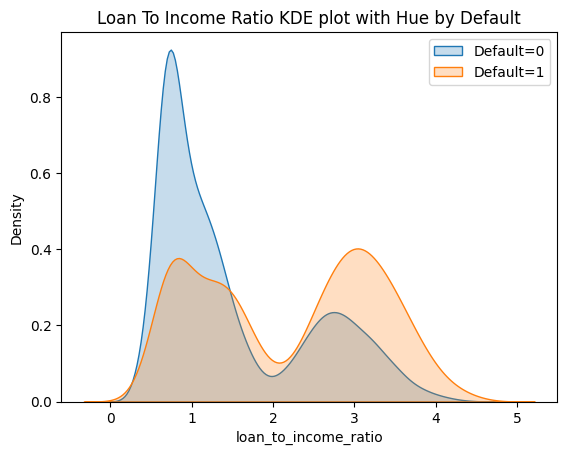

In [45]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['loan_to_income_ratio'], fill=True, label='Default=0')
sns.kdeplot(df_train1[df_train1['default'] == 1]['loan_to_income_ratio'], fill=True, label='Default=1')
plt.title('Loan To Income Ratio KDE plot with Hue by Default')
plt.legend()
plt.show()

In [46]:
df_train1['delinquency_ratio'] = round(df_train1['delinquent_months']/df_train1['total_loan_months'], 2)
df_train1['delinquency_ratio'].describe()

count   37488.00
mean        0.10
std         0.17
min         0.00
25%         0.00
50%         0.04
75%         0.13
max         1.00
Name: delinquency_ratio, dtype: float64

In [47]:
df_test1['delinquency_ratio'] = round(df_test1['delinquent_months']/df_test1['total_loan_months'], 2)
df_test1['delinquency_ratio'].describe()

count   12497.00
mean        0.11
std         0.17
min         0.00
25%         0.00
50%         0.04
75%         0.13
max         1.00
Name: delinquency_ratio, dtype: float64

In [48]:
df_train1['delinquency_ratio'].isnull().sum()

0

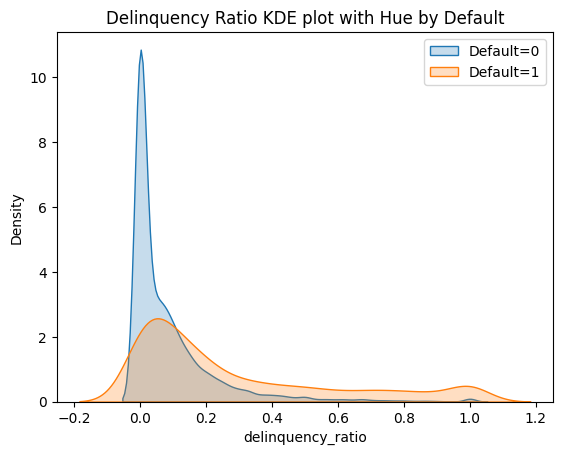

In [49]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['delinquency_ratio'], fill=True, label='Default=0')
sns.kdeplot(df_train1[df_train1['default'] == 1]['delinquency_ratio'], fill=True, label='Default=1')
plt.title('Delinquency Ratio KDE plot with Hue by Default')
plt.legend()
plt.show()

In [50]:
numerical_cols

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [51]:
df_train1['avg_dpd_per_deliquency'] = np.where(
    df_train1['delinquent_months'] != 0,
    (round(df_train1['total_dpd']/df_train1['delinquent_months'], 2)), 0)
df_train1['avg_dpd_per_deliquency'].describe()

count   37488.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.33
75%         5.74
max        10.00
Name: avg_dpd_per_deliquency, dtype: float64

In [52]:
df_test1['avg_dpd_per_deliquency'] = np.where(
    df_test1['delinquent_months'] != 0,
    (round(df_test1['total_dpd']/df_test1['delinquent_months'], 2)), 0)
df_test1['avg_dpd_per_deliquency'].describe()

count   12497.00
mean        3.34
std         2.90
min         0.00
25%         0.00
50%         4.40
75%         5.75
max        10.00
Name: avg_dpd_per_deliquency, dtype: float64

In [53]:
df_train1['avg_dpd_per_deliquency'].isnull().sum()

0

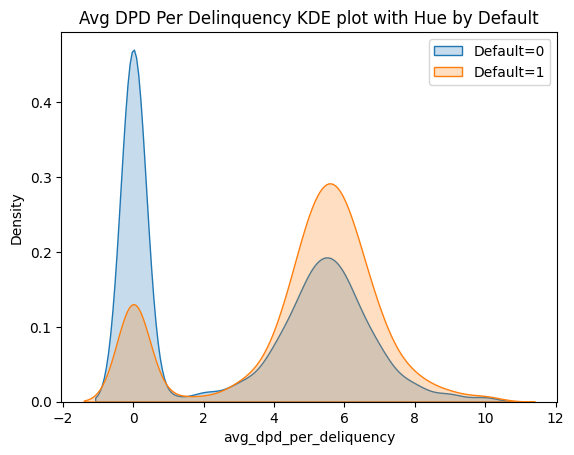

In [54]:
sns.kdeplot(df_train1[df_train1['default'] == 0]['avg_dpd_per_deliquency'], fill=True, label='Default=0')
sns.kdeplot(df_train1[df_train1['default'] == 1]['avg_dpd_per_deliquency'], fill=True, label='Default=1')
plt.title('Avg DPD Per Delinquency KDE plot with Hue by Default')
plt.legend()
plt.show()

#### Feature Selection

In [55]:
df_train2 = df_train1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test1.drop(['cust_id', 'loan_id'], axis=1)

In [56]:
df_train2.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [57]:
df_train3 = df_train2.drop(['disbursal_date', 'installment_start_dt', 
                            'income', 'loan_amount', 'total_loan_months', 
                            'delinquent_months', 'total_dpd'], axis=1)
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 
                            'income', 'loan_amount', 'total_loan_months', 
                            'delinquent_months', 'total_dpd'], axis=1)


In [58]:
df_train3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [59]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [60]:
num_cols = df_train3.select_dtypes(['int64', 'float64', 'int32']).columns
num_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [61]:
X_train = df_train3.drop(['default'], axis=1)
y_train = df_train3['default']

In [62]:
cols_to_scale = X_train.select_dtypes(['int64','int32', 'float64']).columns

In [63]:
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [64]:
X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_deliquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,0.49,0.33,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,0.76,...,0.64,0.20,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,0.51,...,0.17,0.12,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [65]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variables'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X_train[cols_to_scale])

,Variables,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [66]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']
X_train1 = X_train.drop(features_to_drop_vif, axis=1)
cols_to_scale1 = X_train1.select_dtypes(['int64', 'float64']).columns
vif_df = calculate_vif(X_train1[cols_to_scale1])
vif_df

,Variables,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [67]:
selected_numeric_features_vif = vif_df['Variables'].values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio',
       'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_deliquency'], dtype=object)

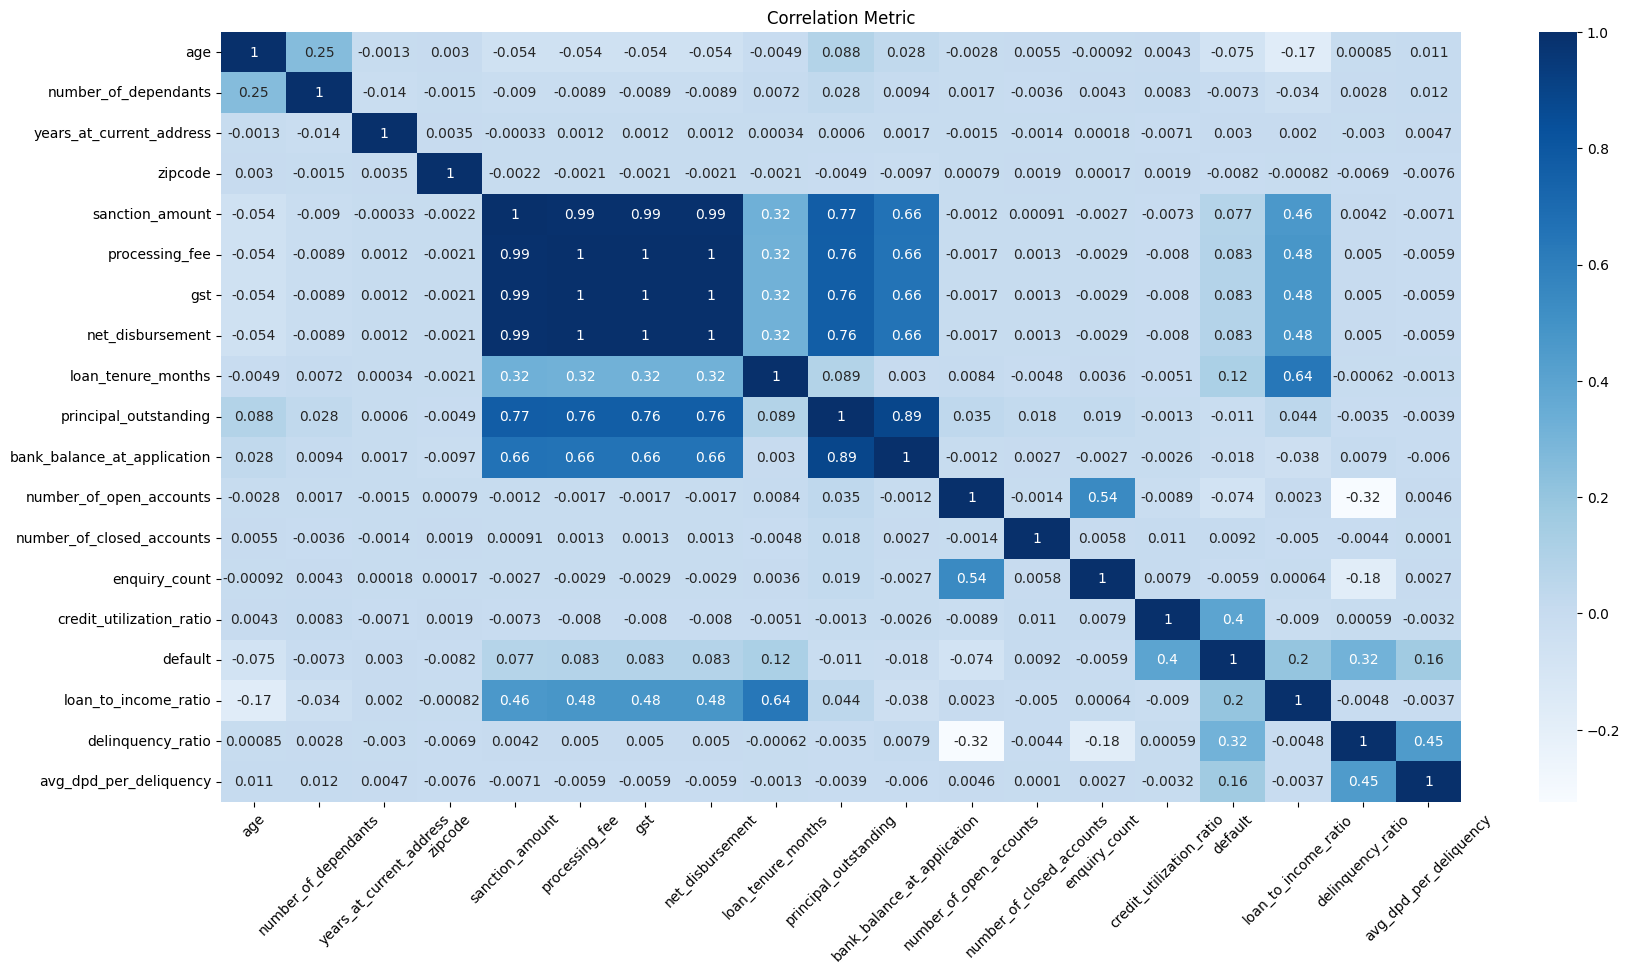

In [68]:
corr_cols = df_train3.select_dtypes(['int64', 'float64', 'int32']).columns
cm = df_train3[corr_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.title('Correlation Metric')
plt.xticks(rotation=45)
plt.show()

In [69]:
X_test = df_test.drop(['default'], axis=1)
y_test = df_test['default']

cols_to_scale = X_test.select_dtypes(['int64', 'float64','int32']).columns


In [70]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [71]:
categorical_cols

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type', 'disbursal_date',
       'installment_start_dt'],
      dtype='object')

In [72]:
temp = pd.concat([X_train1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [73]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = grouped['woe'] * (grouped['good_pct'] - grouped['bad_pct'])
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(temp, 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [74]:
total_iv

0.3691197842282755

In [75]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
iv_values = {}
for feature in X_train1.columns:
    if X_train1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train1, y_train], axis=1), feature, 'default')
    else:
        X_binned = pd.cut(X_train1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    iv_values[feature] = iv

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.713
18,loan_to_income_ratio,0.476
20,avg_dpd_per_deliquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [76]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'delinquency_ratio',
 'avg_dpd_per_deliquency']

#### Feature Encoding

In [77]:
X_train_reduced = X_train1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [78]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_deliquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.130,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.060,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.220,0.558
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [79]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.130,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.060,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.220,0.558,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


<h3 style='color:blue' align='center'>Model Training</h3>

Attempt 1
1. Logistic Regression, RandomForest & XGB
2. No hhandling of class imbalance

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [82]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [83]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': 1438.44988828766}
Best Score: 0.7571414051836808
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [84]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7860966695101134
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.97     12497



Attempt 2
1. Logistic Regression & XGB
2. Handle Class Imbalance Using Under Sampling

In [85]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [86]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [87]:
model = XGBClassifier()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.55      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



Attempt 3
1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tunning using optuna

In [88]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)

y_train_smt.value_counts()

default
0    34201
1    34201
Name: count, dtype: int64

In [89]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [90]:
model = XGBClassifier()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.83      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [91]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score


def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    model = LogisticRegression(**param, max_iter=10000)

    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-03-03 21:32:57,629] A new study created in memory with name: no-name-3ecd4450-856e-44ff-8a79-c8221c416cf4
[I 2025-03-03 21:32:57,750] Trial 0 finished with value: 0.9025601251634136 and parameters: {'C': 0.0009827794785754798, 'solver': 'lbfgs', 'tol': 0.0005923755076318958, 'class_weight': None}. Best is trial 0 with value: 0.9025601251634136.
[I 2025-03-03 21:32:57,960] Trial 1 finished with value: 0.9457463249494392 and parameters: {'C': 4.572663328573913, 'solver': 'newton-cg', 'tol': 2.3202899809458564e-06, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9457463249494392.
[I 2025-03-03 21:32:58,143] Trial 2 finished with value: 0.9397512284779349 and parameters: {'C': 0.06501433354802205, 'solver': 'newton-cg', 'tol': 1.2864384525851997e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9457463249494392.
[I 2025-03-03 21:32:58,406] Trial 3 finished with value: 0.945689051190555 and parameters: {'C': 4618.131126252022, 'solver': 'saga', 'tol': 5.1785

In [92]:
print('Best trial: ')
trial = study_logistic.best_trial
print(' F1-score: {}'.format(trial.value))
print(' Params: ')
for key, value in trial.params.items():
    print('   {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Best trial: 
 F1-score: 0.9460109890087786
 Params: 
   C: 41.95176046387303
   solver: lbfgs
   tol: 0.0003615836931961143
   class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [93]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-03-03 21:33:07,112] A new study created in memory with name: no-name-1dcb706d-b66b-4bee-8413-98121b075457
[I 2025-03-03 21:33:07,779] Trial 0 finished with value: 0.9635734377381597 and parameters: {'lambda': 0.07351706609918425, 'alpha': 0.021553193411390212, 'subsample': 0.4544762429751776, 'colsample_bytree': 0.8028770450578786, 'max_depth': 6, 'eta': 0.28148211186276, 'gamma': 7.893032364767057, 'scale_pos_weight': 4.734066803937372, 'min_child_weight': 8, 'max_delta_step': 1}. Best is trial 0 with value: 0.9635734377381597.
[I 2025-03-03 21:33:08,501] Trial 1 finished with value: 0.9099287926245753 and parameters: {'lambda': 0.6569925807608606, 'alpha': 0.010388170304686629, 'subsample': 0.6713170190249251, 'colsample_bytree': 0.41307036384553114, 'max_depth': 5, 'eta': 0.06443975437318215, 'gamma': 6.583581832227016, 'scale_pos_weight': 8.608645309102121, 'min_child_weight': 4, 'max_delta_step': 6}. Best is trial 0 with value: 0.9635734377381597.
[I 2025-03-03 21:33:09,20

In [94]:
print('Best trial: ')
trial = study_xgb.best_trial
print(' F1-score: {}'.format(trial.value))
print(' Params: ')
for key, value in trial.params.items():
    print('   {}: {}'.format(key, value))


best_params = study_xgb.best_params
best_model_XGB = XGBClassifier(**best_params)
best_model_XGB.fit(X_train_smt, y_train_smt)

y_pred = best_model_XGB.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Best trial: 
 F1-score: 0.9736205706531775
 Params: 
   lambda: 0.26761323801316866
   alpha: 0.02393638498341687
   subsample: 0.6664633371966886
   colsample_bytree: 0.8721796465178449
   max_depth: 6
   eta: 0.28614422359505365
   gamma: 1.4992601835275
   scale_pos_weight: 1.3303252302895623
   min_child_weight: 6
   max_delta_step: 0
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.85      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [95]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [96]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, threshold = roc_curve(y_test, probabilities)

In [97]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836124021074798

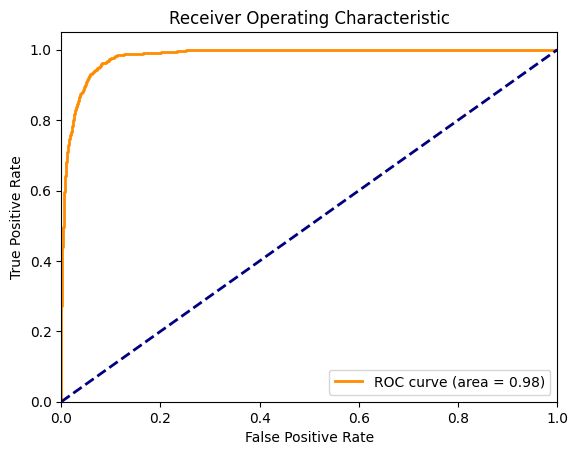

In [98]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Model Evaluation: Rank Order & KS Statistic

In [103]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
df_eval = pd.DataFrame({
    "Default Truth": y_test,
    "Default Probability": probabilities
})

df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.535
15514,0,0.000
30367,0,0.006


In [104]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.535,8
15514,0,0.000,2
30367,0,0.006,6


In [106]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))

df_grouped.reset_index(inplace=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,0.000,1249.000
6,6,0.004,0.027,5.000,1245.000
7,7,0.027,0.207,9.000,1240.000
8,8,0.208,0.821,161.000,1089.000
9,9,0.821,1.000,899.000,351.000


In [107]:
df_grouped['Event Rate'] = df_grouped['Events'] * 100 / (df_grouped['Events'] + df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events'] * 100 / (df_grouped['Events'] + df_grouped['Non-events'])
df_grouped


,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
6,6,0.004,0.027,5.000,1245.000,0.400,99.600
7,7,0.027,0.207,9.000,1240.000,0.721,99.279
8,8,0.208,0.821,161.000,1089.000,12.880,87.120
9,9,0.821,1.000,899.000,351.000,71.920,28.080


In [108]:
df_grouped = df_grouped.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.821,1.000,899.000,351.000,71.920,28.080
1,8,0.208,0.821,161.000,1089.000,12.880,87.120
2,7,0.027,0.207,9.000,1240.000,0.721,99.279
3,6,0.004,0.027,5.000,1245.000,0.400,99.600
4,5,0.001,0.004,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [109]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non-events'].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.821,1.000,899.000,351.000,71.920,28.080,899.000,351.000
1,8,0.208,0.821,161.000,1089.000,12.880,87.120,1060.000,1440.000
2,7,0.027,0.207,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.004,0.027,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [110]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.821,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073
1,8,0.208,0.821,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606
2,7,0.027,0.207,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.004,0.027,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [111]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.821,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073,80.633
1,8,0.208,0.821,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606,86.090
2,7,0.027,0.207,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.004,0.027,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [122]:
gini_coefficient = 2 * area - 1

print("AUC: ", area)
print("Gini Coefficient: ", gini_coefficient)

AUC:  0.9836124021074798
Gini Coefficient:  0.9672248042149596


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Feature Importance

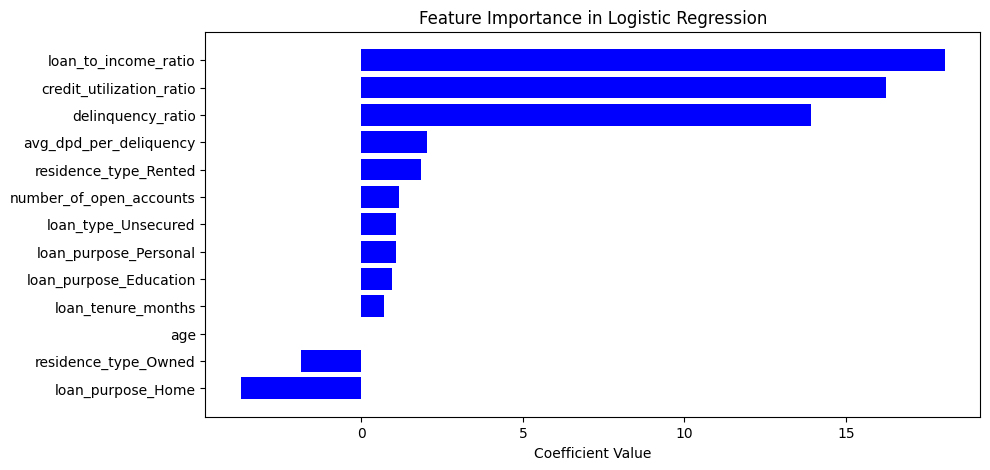

In [119]:
final_model = best_model_logistic
feature_importance = final_model.coef_[0]
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(coef_df.index, coef_df['Coefficients'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [121]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']